# Решение нелинейных уравнений (численное) Лекция 1

$f(x) = 0$

Степень == количество корней

Трансцендентные == e, log... -> колько угодно корней

## Методы:
1. точные
2. приближенные => редко

## 1. Локализация корней
Находим интервал изоляции корня

## 2. Уточнение до заданной точности
1. графический

Строим график, точка пересечения с OX - корень

2. аналитический

__Теорема__ - если $f(a) * f(b) < 0, sign(f`(x))=const$, то есть один корень

__Устойчивость__ - незначительные изменения исходных данных ведут к незначительным изменениям результатов

__Сходимость__ - решение задачи сходится к точному решению ($\lim_{n \rightarrow \infty}x_n = x*$)

__Скорость сходимости__ - чаще всего количество итераций (линейная, сверхлинейная, квадратичная)

## Метод половинного деления
Реализация ниже

Применяем для точного решения, довольно медленный

Если несколько корней выберется рандомный. Проверяем первую производную

$$x_i = \frac{a_i + b_i}{2}$$

## Метод хорд
1. Соединяем ab хордой, получим абсциссу ($x_0$)
2. Уточняем интервал

Рабочая математика $$\frac{(y-f(a)}{f(b)-f(a)}=\frac{x-a}{b-a}$$

$x_n=\frac{a_nf(b_n)}{}$

## Метод Ньютона (качательной)
1. Заменяем отрезок касательной
2. Пересечение с OX - $x_0$, очередное приближение

Математика: $$x_n=x_{n-1}-\frac{f(x_0)}{f`(x_0)}$$

### Условия:
1. Функция определена и непрерывна
2. __Теорема1__ выполняется
3. $sing(f`(x)), sign(f``(x)) == const$
4. $f`(x) \neq 0$
5. Первое приближение: $f(x)*f``(x)>0$

## Метод секущих
Математика: $$x_{i+1}=x_i-\frac{x_i - x_{i-1}}{f(x_i) - f(x_{i-1})}f(x_i)i$$

__ДЗ: метод простых итераций__

__Лаба: метод Ньютона и половинного__

In [1]:
def half(a, b, eps, i = 1, iter_meta = [["i", "a", "b", "x", "f(a)", "f(b)", "f(x)", "len"]]):
  x_0 = (a + b)/2

  l = interval_len(a, b)

  iter_meta.append([i,round(a, 3),round(b, 3),round(x_0, 3),round(fun(a), 3),round(fun(b), 3),round(fun(x_0), 3),round(l, 3)])

  if abs(fun(x_0)) <= eps:
    return [x_0, fun(x_0), i, iter_meta]

  if validate(a, x_0):
    return half(a, x_0, eps, i + 1, iter_meta)
  else:
    return half(x_0, b, eps, i + 1, iter_meta)

In [2]:
def derivative(x, coef_0 = 1, coef_1 = 4.81, coef_2 = -17.37):
    return fun(x, 0, 3*coef_0, 2*coef_1, coef_2)

def second_deriative(x, coef_0 = 1, coef_1 = 4.81, coef_2 = -17.37):
    return fun(x, 0, 0, 6*coef_0, 2*coef_1)

def first_side(a, b):
    if fun(a)*second_deriative(a) > 0:
        return a
    else: return b

def newton(a, b, eps, old_x = 0, i = 1, iter_meta = []):
    if i == 1:
        x_0 = first_side(a, b)
        old_x = x_0

    x_0 = old_x - (fun(old_x)/derivative(old_x))
    
    iter_meta.append([i, round(old_x, 3), round(fun(old_x), 3), round(derivative(old_x), 3), round(x_0, 3), round(abs(old_x - x_0), 3)])

    if abs(fun(old_x)) <= eps:
        return [old_x, fun(old_x), i, iter_meta]
    
    if validate(a, x_0):
        return newton(a, x_0, eps, x_0, i + 1, iter_meta)
    else:
        return newton(x_0, b, eps, x_0, i + 1, iter_meta)

In [3]:
def build_plot():
    x = np.array(np.arange(-8, 3, step=0.0001))
    y = (x**3) + (4.81 * x**2) - (17.37 * x) + 5.38
    plt.plot(x, y)
    plt.grid()
    plt.show()

In [4]:
def fun(x, coef_0 = 1, coef_1 = 4.81, coef_2 = -17.37, coef_3 = 5.38):
    return (coef_0 * x**3) + (coef_1 * x**2) + (coef_2 * x) + coef_3

In [5]:
def validate(a, b):
    if fun(a)*fun(b) < 0:
        return True
    else: return False

In [6]:
def interval_len(a, b):
    if a < 0 and b > 0:
        l = b + abs(a)
    elif a < 0 and b < 0:
        l = abs(a) - abs(b)
    else: l = b - a
    return l

In [7]:
def parse_file(in_file):
    out = {}
    file = open(in_file, 'r')
    for line in file:
        line = line.rstrip()
        temp = line.split('=', maxsplit=1)
        out[temp[0]] = temp[1]
    return out

In [13]:
def enter_by_hands(a = None, b = None, eps = None):
    try:
        if (a is None):
            print("Enter parameter 'a':")
            a = float(input())
    except:
        cprint("Values should be represented as numbers", 'red')
        return enter_by_hands()
        
    try:
        if (b is None):
            print("Enter parameter 'b':")
            b = float(input())
    except:
        cprint("Values should be represented as numbers", 'red')
        return enter_by_hands(a)
    
    try:
        print("Enter parameter 'eps':")
        eps = float(input())
    except:
        cprint("Values should be represented as numbers", 'red')
        return enter_by_hands(a, b)
    
    return [a, b, eps]
    

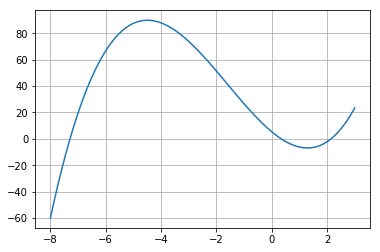

Would you like to load settings from a file? [Y/n]
wbr
Enter parameter 'a':
-8
Enter parameter 'b':
-7
Enter parameter 'eps':
0.1

-------------------------------------Results-------------------------------------
1. Half dividing: x = -7.29296875, f(x) = -0.0037679935, 8 iterations
2. Newton: x = -7.292917437647474, f(x) = -0.000071813616382, 4 iterations
---------------------------------------------------------------------------------
Would you like to see computational listings? [Y/n]


Half-dividing method


i,a,b,x,f(a),f(b),f(x),len
1,-8.0,-7.0,-7.5,-59.82,19.66,-15.657,1.0
2,-7.5,-7.0,-7.25,-15.657,19.66,3.06,0.5
3,-7.5,-7.25,-7.375,-15.657,3.06,-6.028,0.25
4,-7.375,-7.25,-7.312,-6.028,3.06,-1.417,0.125
5,-7.312,-7.25,-7.281,-1.417,3.06,0.838,0.062
6,-7.312,-7.281,-7.297,-1.417,0.838,-0.285,0.031
7,-7.297,-7.281,-7.289,-0.285,0.838,0.277,0.016
8,-7.297,-7.289,-7.293,-0.285,0.277,-0.004,0.008



Newton method


i,x_i,f(x_i),f'(x_i),x_(i+1),|x_i - x_(i+1)|
1,-8.0,-59.82,97.67,-7.388,0.612
2,-7.388,-6.969,75.289,-7.295,0.093
3,-7.295,-0.148,72.102,-7.293,0.002
4,-7.293,-0.0,72.032,-7.293,0.0


Save result to the file? [Y/n]
n


In [18]:
# Importing computational modules
from IPython.display import HTML, display
import tabulate
import numpy as np
import matplotlib.pyplot as plt
from termcolor import cprint

def main(repeat = False):
    if (not repeat):
        # Building a plot
        build_plot()

    # Main program
    print("Would you like to load settings from a file? [Y/n]")
    res = input()
    if res == "" or res == "Y" or res == "y":
        args = {}
        print("Please, enter file name:")
        file = input()
        try:
            args = parse_file(file)
        except:
            cprint("No such file", 'red')
            return main(True)
        try:
            a = float(args.get('--a'))
            b = float(args.get('--b'))
            eps = float(args.get('--eps'))
            cprint(f"Succesfully loaded from '{file}': a = {a}, b = {b}, eps = {eps}", 'green')
        except:
            cprint("Values should be represented as numbers", 'red')
            return main(True)
        if a is None or b is None or eps is None:
            cprint("File should contain '--a', '--b' and '--eps' keys", 'red')
            return main(True)
    else:
        res = enter_by_hands()
        a = res[0]
        b = res[1]
        eps = res[2]
    
    if interval_len(a, b) < 0:
        cprint("Negative interval lenght", 'red')
        return main(True)
    if not validate(a, b):
        cprint("Interval should contain one root", 'red')
        return main(True)

    iter_meta = [["i", "a", "b", "x", "f(a)", "f(b)", "f(x)", "len"]]
    half_div_res = half(a, b, eps, 1, iter_meta)
    iter_meta = [["i", "x_i", "f(x_i)", "f'(x_i)", "x_(i+1)", "|x_i - x_(i+1)|"]]
    newton_res = newton(a, b, eps, 0, 1, iter_meta)

    print('\n-------------------------------------Results-------------------------------------')
    print(f"1. Half dividing: x = {half_div_res[0]}, f(x) = {half_div_res[1]:.10f}, {half_div_res[2]} iterations")
    print(f"2. Newton: x = {newton_res[0]}, f(x) = {newton_res[1]:.15f}, {newton_res[2]} iterations")
    print('---------------------------------------------------------------------------------')

    print("Would you like to see computational listings? [Y/n]")
    res = input()
    if res == "" or res == "Y" or res == "y":
        print("\nHalf-dividing method")
        display(HTML(tabulate.tabulate(half_div_res[3], tablefmt='html')))
        print("\nNewton method")
        display(HTML(tabulate.tabulate(newton_res[3], tablefmt='html')))
    
    print("Save result to the file? [Y/n]")
    res = input()
    if res == "" or res == "Y" or res == "y":
        print("Enter file name:")
        file_name = input()
        try:
            file = open(file_name, 'a')
            file.write("-------------------------------------Results-------------------------------------\n")
            file.write(f"1. Half dividing: x = {half_div_res[0]}, f(x) = {half_div_res[1]:.10f}, {half_div_res[2]} iterations\n")
            file.write(f"2. Newton: x = {newton_res[0]}, f(x) = {newton_res[1]:.15f}, {newton_res[2]} iterations\n")
            file.write("---------------------------------------------------------------------------------\n")
            file.close()
            cprint("Succesfully written", 'green')
        except:
            cprint("I/O error", 'red')
        
        
main()